In [17]:
import time
import time
import warnings
import pandas as pd
import numpy as np
from numpy import newaxis
from sklearn import preprocessing
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import TensorBoard 
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers import Merge
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
def load_data(filename, seq_len, normalise_window):
    f=pd.read_csv(filename, delimiter = '\t')
    data=np.array(f)
    data=data.astype('float')
    
    n = data.shape[0]
    train_start = 0
    train_end = int(np.floor(0.9*n))
    test_start = train_end
    test_end = n
    data_train = data[np.arange(train_start, train_end), :]
    data_test = data[np.arange(test_start, test_end), :]
    
    if normalise_window:
        scaler = MinMaxScaler()
        scaler.fit(data_train)
        data_train = scaler.transform(data_train)
        data_test = scaler.transform(data_test)
    
    sequence_length = seq_len + 1
    result_train = []
    for index in range(len(data_train) - sequence_length):
        result_train.append(data_train[index: index + sequence_length])
    result_test = []
    for index in range(len(data_test) - sequence_length):
        result_test.append(data_test[index: index + sequence_length])
    
    result_train = np.array(result_train)
    result_test = np.array(result_test)
    
    Y = result_train[:,0]
    X = result_train[:,1:]
    
    x_train = X[:, :-1]
    y_train = Y[:, -16]
    cY = result_test[:,0]
    cX = result_test[:,1:]
    x_test = cX[:, :-1]
    y_test = cY[:, -16]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_train.shape[2]))  

    return [x_train, y_train, x_test, y_test]

In [3]:
#Шаг 1 Загружаем данные
X_train, y_train, X_test, y_test = load_data('msft2.csv', 50, True)

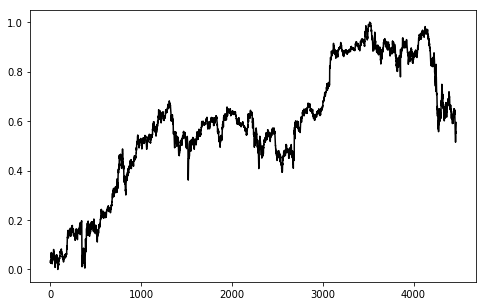

(4471,)

In [13]:
plt.plot(y_train, color='black', label = 'Train data')
plt.show()
y_train.shape

In [7]:
#Шаг 2 Строим модель
model = Sequential()

model.add(LSTM(
    input_dim=16,
    output_dim=800,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    800,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    800))


model.add(Dense(
    16))
model.add(LeakyReLU())

model.add(Dense(
    output_dim=1, activation = 'linear'))



start = time.time()
model.compile(loss='mse', optimizer='rmsprop',)
print 'compilation time : ', time.time() - start

compilation time :  0.0131559371948


In [8]:
#Шаг 3 Обучаем модель
#tensorboard=TensorBoard(log_dir='./logs1', write_graph=True)

history = model.fit(X_train, y_train,
                    batch_size=512,
                    nb_epoch=5,
                    validation_split=0.01,
                    )


Train on 4426 samples, validate on 45 samples
Epoch 1/5
4426/4426 [==============================] - 226s 51ms/step - loss: 24.0605 - val_loss: 0.2391
Epoch 2/5
4426/4426 [==============================] - 220s 50ms/step - loss: 0.1440 - val_loss: 0.0252
Epoch 3/5
4426/4426 [==============================] - 219s 50ms/step - loss: 0.0325 - val_loss: 0.0259
Epoch 4/5
4426/4426 [==============================] - 220s 50ms/step - loss: 0.0360 - val_loss: 0.0713
Epoch 5/5
4426/4426 [==============================] - 219s 49ms/step - loss: 0.0489 - val_loss: 0.0073


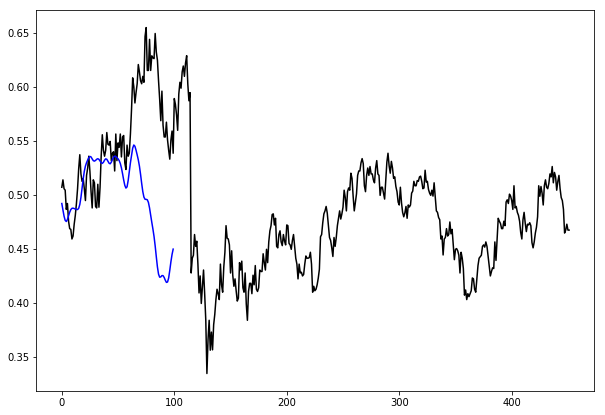

In [18]:
#Шаг 4 Визуализируем модель
predictions = model.predict(X_test[:100])
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')


plt.show()

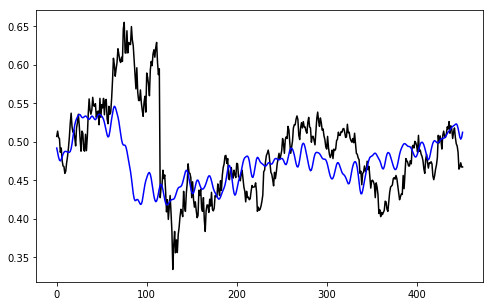

In [9]:
#Шаг 4 Визуализируем модель
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')


plt.show()

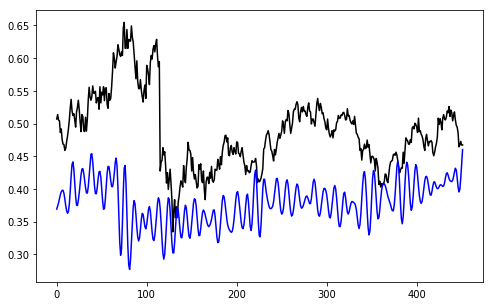

In [19]:
#Шаг 4 Визуализируем модель
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')


plt.show()

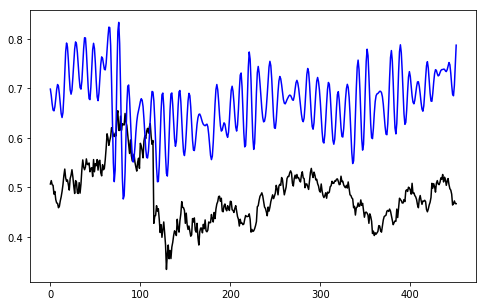

In [17]:
#Шаг 4 Визуализируем модель
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')


plt.show()

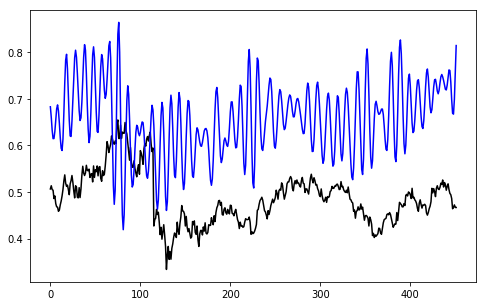

In [13]:
#Шаг 4 Визуализируем модель
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')


plt.show()

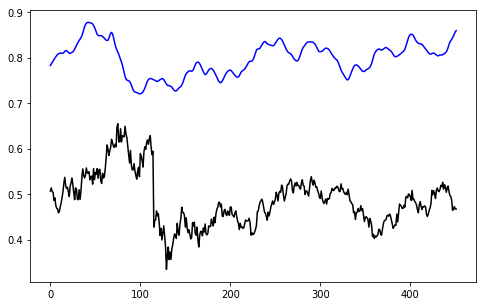

In [29]:
#Шаг 4 Визуализируем модель
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')


plt.show()

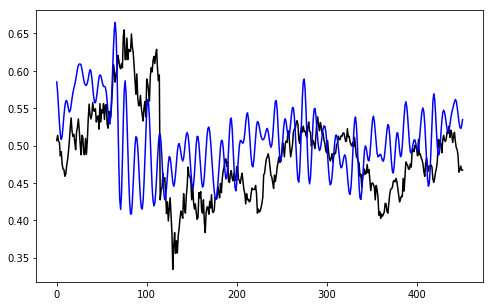

In [16]:
#Шаг 4 Визуализируем модель
predictions = model.predict(X_test)
plt.plot(y_test, color='black', label = 'Test data')
plt.plot(predictions, color='blue', label = 'Predicted data')


plt.show()

In [15]:
#Сохраняем модель
model_yaml = model.to_yaml()

yaml_file = open("model_lstm_msft100.yml","w")
yaml_file.write(model_yaml)
yaml_file.close()

model.save_weights("model_lstm_msft100.h5")


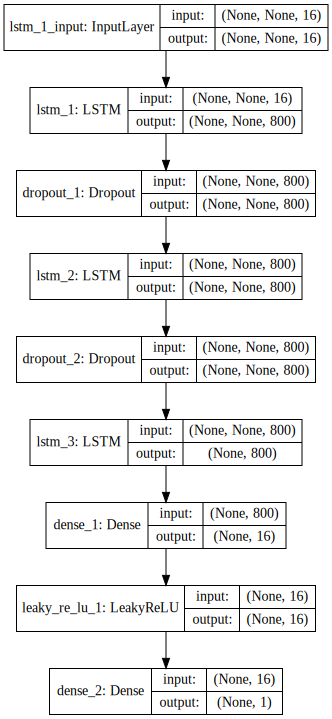

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model1.png', show_shapes=True)
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))